# Problem Statement

### Importing Libraries

In [36]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

import keras 
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten, Conv1D, MaxPooling1D
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras import layers

#NLP for text pre-processing
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

# for spliting data set and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Handling imbalance data
from imblearn.over_sampling import SMOTE

# Plot the Figures Inline
%matplotlib inline


Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [38]:
import tensorflow


ModuleNotFoundError: No module named 'tensorflow'

In [32]:
#NLP for text pre-processing
import nltk
from nltk.corpus import stopwords
#from wordcloud import WordCloud, STOPWORDS

# for spliting data set and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Handling imbalance data
#from imblearn.over_sampling import SMOTE

# Plot the Figures Inline
%matplotlib inline

In [10]:
!pip install tensorflow

  Could not find a version that satisfies the requirement tensorflow (from versions: )
No matching distribution found for tensorflow
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# Data Importing

In [4]:
# Loading the dataset
df = pd.read_csv('ecommerce.csv')

# Data Exploration

In [11]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17533 entries, 0 to 17532
Data columns (total 15 columns):
uniq_id                    17533 non-null object
crawl_timestamp            17533 non-null object
product_url                17533 non-null object
product_name               17533 non-null object
product_category_tree      17533 non-null object
pid                        17533 non-null object
retail_price               17472 non-null float64
discounted_price           17472 non-null float64
image                      17530 non-null object
is_FK_Advantage_product    17533 non-null bool
description                17532 non-null object
product_rating             17533 non-null object
overall_rating             17533 non-null object
brand                      12301 non-null object
product_specifications     17522 non-null object
dtypes: bool(1), float64(2), object(12)
memory usage: 1.9+ MB


In [ ]:
#Observations
1.DataSet has total 15 columns and 17533 Observations
2.Retail_price & discounted_price cloumns are numerical and remaining are categorical

In [6]:
df.shape

(17533, 15)

# EDA

### Summary Statistics

In [8]:
#Univariate Analysis
df.describe()

,retail_price,discounted_price
count,17472.000000,17472.000000
mean,2949.762191,1931.937843
std,8547.011072,7172.070896
min,35.000000,35.000000
25%,699.000000,350.000000
50%,1050.000000,549.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [10]:
#checking the unique values & count for each categorical column
for i in df.columns:
    if df[i].dtype=="object":
        print(i,' ',df[i].describe())
        print('================================')
        print('\n')

uniq_id   count                                17533
unique                               17533
top       9f6ba452a48a95362399b7871beca2b6
freq                                     1
Name: uniq_id, dtype: object


crawl_timestamp   count                         17533
unique                          342
top       2015-12-01 12:40:44 +0000
freq                           1960
Name: crawl_timestamp, dtype: object


product_url   count                                                 17533
unique                                                17533
top       http://www.flipkart.com/iball-wireless-n-route...
freq                                                      1
Name: product_url, dtype: object


product_name   count                                          17533
unique                                         10770
top       TheLostPuppy Back Cover for Apple iPad Air
freq                                             134
Name: product_name, dtype: object


product_category_tree   count     

# Observations
1.uniq_id has 17533 different values so we can drop this column.
2.product_url is combination of product name and pid.
3.product_name details are already availble in the description field.        
4.pid has 17533 different values so we can drop this column.
5.retail_price & discounted_price are not useful for our classification because these prices are not constant.
6.image details are not available currently.
7.Most of the observations are not having values for product_rating & overall_rating features.
8.brand has more than 30% null values.so we are droping this field also.


9.description & product_specifications are useful features for our text classification and product_category_tree is the target field.
10.We are considering only "description" as a feature for current work. 

In [6]:
df['product_category_tree'].value_counts()

Clothing                       6198
Jewellery                      3531
Footwear                       1227
Mobiles & Accessories          1099
Automotive                     1012
Home Decor & Festive Needs      929
Kitchen & Dining                647
Computers                       578
Watches                         530
Baby Care                       483
Tools & Hardware                391
Toys & School Supplies          330
Pens & Stationery               313
Bags, Wallets & Belts           265
Name: product_category_tree, dtype: int64

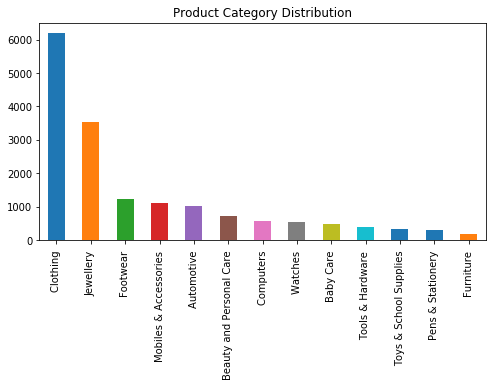

In [10]:
#Analysis of the Product Category distribution plot for the given data
fig, ax = plt.subplots(figsize=[8,4], nrows=1, ncols=1)
df['product_category_tree'].value_counts().plot(ax=ax, kind='bar', title='Product Category Distribution')

### Observation
Imbalance data


In [12]:
# Adding new column "length" which gives the total length of input variable "Description"
df['length']=df['description'].str.len()

In [13]:
maxlength = df['length'].max()
minlength = df['length'].min()
maxlength,minlength

(5309.0, 74.0)

In [15]:
df[df['length'] == maxlength]['description'].iloc[0]

"Asian Gems & Jewels 6.25 Ratti 5 Dhaatu Sterling Silver, Metal, Alloy Cat's Eye NA K Ring\n                         Price: Rs. 828\n\t\t\t\t\n\t\t\tAsian Gem & Jewellery offers you Panch dhaatu Cultured Gemstone Finger Ring . 'ASIAN GEMS & JEWELS' and all its grading standards and content (Copyright Registered)\n belongs to the Owners of NEW INDIA WORKS (NIW).\nIn Hindi, '9' means 'Nav' and '5' means 'Punch'. Gem is called 'Ratna', whereas any 'Metal or Mineral or Element' is referred as 'Dhaatu'.\nRegarding 9 Gemstones. 'Nav Ratnas' means an 'Astro Planetary' communicating team of 9 Precious and Semi Precious Gemstones those are believed to reach and connect out to 9 Planets residing, revolving in our galaxy. \nIn the Birth Horoscope of an individual, if any planet is weak or some other planets are not sitting in the right degree/position or house or are opposing or suppressing some other planets than :-\nRUBY (MANIK) is considered to connect, enhance and empower Planet Sun (Surya) .

#Observation
Maximum desription observation belongs to Jewellery Category 

In [14]:
#Adding New column with no of words in the description before text pre processing
df['no_of_words'] = df.description.apply(lambda x : len(x.split()))

AttributeError: 'float' object has no attribute 'split'

### Word count distribution before text cleaning

In [20]:
bins=[0,50,75, np.inf]
df['bins']=pd.cut(df.no_of_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-200', '200-500','500-800' ,'>800'])

In [21]:
words_distribution = df.groupby('bins').size().reset_index().rename(columns={0:'word_counts'})


In [22]:
words_distribution.head()


,bins,word_counts
0,0-100,14227
1,100-200,3028
2,200-500,246
3,500-800,29
4,>800,2


Text(0.5, 1.0, 'Word distribution per bin')

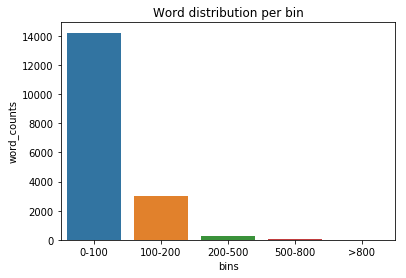

In [23]:
sns.barplot(x='bins', y='word_counts', data=words_distribution).set_title("Word distribution per bin")


In [25]:
#Observation
#Most of the descriptions having less than 200 words.

# Data Preprocessing

### Handling Missing Values 

In [15]:
# Number of missing values in each column
missing = pd.DataFrame(df.isnull().sum()).rename(columns = {0: 'missing'})

# Create a percentage of missing values
missing['percent'] = missing['missing'] / len(df)

# sorting the values in desending order to see highest count on the top
missing.sort_values('percent', ascending = False)

,missing,percent
brand,5232,0.298409
retail_price,61,0.003479
discounted_price,61,0.003479
product_specifications,11,0.000627
image,3,0.000171
description,1,0.000057
length,1,0.000057
uniq_id,0,0.000000
crawl_timestamp,0,0.000000
product_url,0,0.000000


In [16]:
# removing missing values in description
df=df[pd.notnull(df['description'])]


### Text Preprocessing

In [34]:
df['description'][4]

'key features dilli bazaaar bellies corporate casuals casuals material fabric occasion ethnic casual party formal color pink heel height numbr specifications dilli bazaaar bellies corporate casuals casuals general occasion ethnic casual party formal ideal women shoe details weight numbr per single shoe weight product may vary depending size heel height numbr inch outer material fabric color pink'

In [21]:
# Remove punctuation
df['description'] = df['description'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['description'] = df['description'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['description'] = df['description'].str.replace(r'^\s+|\s+?$', '')
# converting to lower case
df['description'] = df['description'].str.lower()
df['description'].head()

0    key features of alisha solid women s cycling s...
1    key features of aw bellies sandals wedges heel...
2    key features of alisha solid women s cycling s...
3    key features of alisha solid women s cycling s...
4    key features of dilli bazaaar bellies corporat...
Name: description, dtype: object

In [22]:
   
# Replace numberslike price values with 'numbr'
df['description'] = df['description'].str.replace(r'\d+(\.\d+)?', 'numbr')


In [33]:
# Removing Stop words
stop = stopwords.words('english')
pattern = r'\b(?:{})\b'.format('|'.join(stop))
df['description'] = df['description'].str.replace(pattern, '')
df['description'] = df['description'].str.replace(r'\s+', ' ')# Removing single characters
df['description'] = df['description'].apply(lambda x: " ".join(x for x in x.split() if len(x)>1))

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sony\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

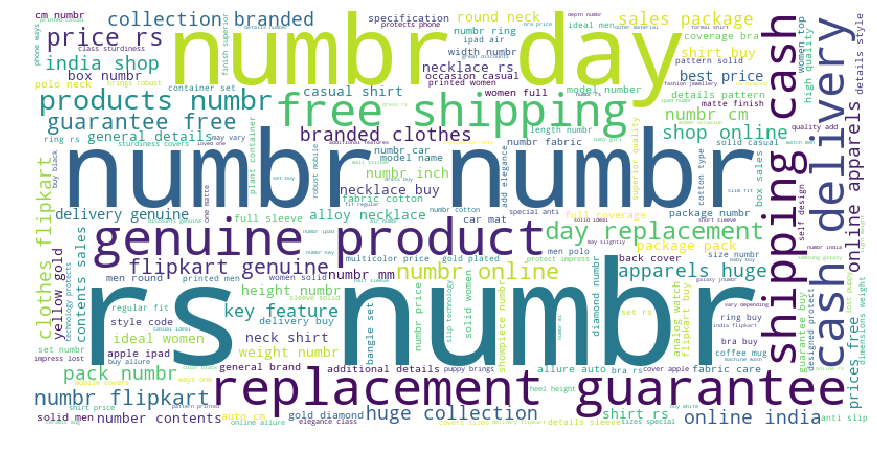

In [41]:
#Wordcloud before removing domain related stop words
wordcloud = WordCloud(background_color="white", width = 800, height = 400).generate(' '.join(df['description']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)    
plt.axis("off")
plt.show()

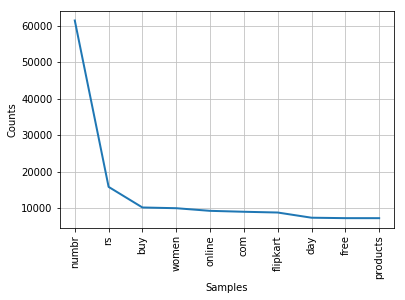

[('numbr', 61378), ('rs', 15797), ('buy', 10152), ('women', 9953), ('online', 9232), ('com', 8980), ('flipkart', 8771), ('day', 7349), ('free', 7230), ('products', 7225)]


In [42]:
# Frequent word list before removing domain related stop words.
a = df['description'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
word_dist.plot(10,cumulative=False)

print(word_dist.most_common(10))

In [43]:
# Removing domain realted stop words from description
specific_stop_words = ["numbr", "rs","flipkart","buy","com","free","day","cash","replacement","guarantee","genuine","key","feature","delivery","products","product","shipping", "online","india","shop"]
df['description'] = df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in specific_stop_words))

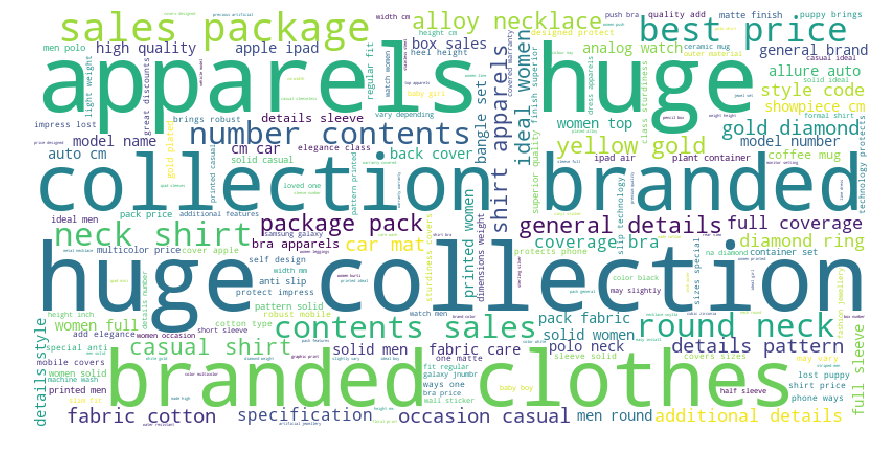

In [44]:
#Wordcloud after removing domain related stop words
wordcloud = WordCloud(background_color="white", width = 800, height = 400).generate(' '.join(df['description']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)    
plt.axis("off")
plt.show()

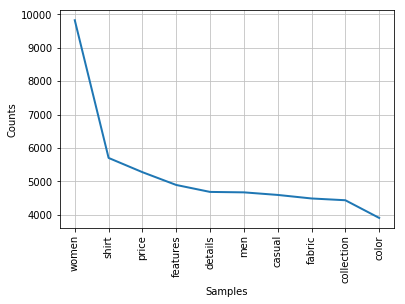

[('women', 9823), ('shirt', 5702), ('price', 5276), ('features', 4893), ('details', 4685), ('men', 4672), ('casual', 4595), ('fabric', 4489), ('collection', 4436), ('color', 3907)]


In [29]:
#Top frequent words after removing domain related stop words
a = df['description'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
word_dist.plot(10,cumulative=False)
print(word_dist.most_common(10))

## Word count distribution After text preprocessing

In [45]:
df['clean_no_of_words'] = df.description.apply(lambda x : len(x.split()))

In [46]:

df['clean_bins']=pd.cut(df.clean_no_of_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-200', '200-500','500-800' ,'>800'])

In [47]:
clean_words_distribution = df.groupby('clean_bins').size().reset_index().rename(columns={0:'clean_word_counts'})

In [48]:
clean_words_distribution.head()

,clean_bins,clean_word_counts
0,0-100,15771
1,100-200,1698
2,200-500,61
3,500-800,2
4,>800,0


Text(0.5, 1.0, 'Clean Word distribution per bin')

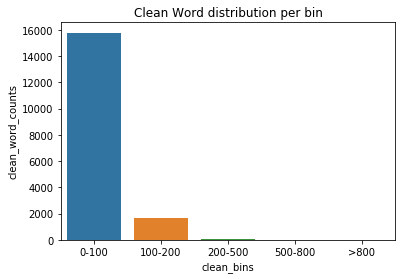

In [49]:
sns.barplot(x='clean_bins', y='clean_word_counts', data=clean_words_distribution).set_title("Clean Word distribution per bin")

## Feature Selection

In [50]:
#We are cosidering only one feature "description" in current work.

### Set number of classes,MAX_LENGTH,features & target

In [35]:
MAX_LENGTH = 200
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['description'])
clean_description = tokenizer.texts_to_sequences(df['description'])
#padding
X = pad_sequences( clean_description, maxlen=MAX_LENGTH)

NameError: name 'Tokenizer' is not defined

In [53]:
# one hot encoding for Target
from sklearn.preprocessing import LabelEncoder
num_class = len(np.unique(df.product_category_tree.values))
y = df['product_category_tree'].values
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [54]:
vocab_size = len(tokenizer.word_index) + 1

### Train-test split

In [55]:
#train test split into X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #train 80, test 20

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14025, 200)
(3507, 200)
(14025,)
(3507,)


In [57]:
y_train.max()

13

In [58]:
for i in range(y_train.max()):
    print(i,len(y_train[y_train==i]))
   

0 806
1 391
2 212
3 4947
4 452
5 966
6 735
7 2845
8 506
9 884
10 265
11 317
12 272


#Handling Imbalance data using SMOTE- Oversampling

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [64]:
for i in range(y_train_res.max()):
    print(i,len(y_train_res[y_train_res==i]))

0 4947
1 4947
2 4947
3 4947
4 4947
5 4947
6 4947
7 4947
8 4947
9 4947
10 4947
11 4947
12 4947


Handling imblance data using downsampling

In [65]:
from imblearn.under_sampling import RandomUnderSampler

sample = RandomUnderSampler(return_indices=True)
X_undersample, y_undersample, id_rus = sample.fit_sample(X, y)

In [66]:
for i in range(y_undersample.max()):
    print(i,len(y_undersample[y_undersample==i]))

0 265
1 265
2 265
3 265
4 265
5 265
6 265
7 265
8 265
9 265
10 265
11 265
12 265


# Modeling

## ANN with Imbalance data

In [67]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=5, callbacks=[checkpointer])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 128)          2286336   
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                819232    
_________________________________________________________________
dense_2 (Dense)              (None, 14)                462       
Total params: 3,106,030
Trainable params: 3,106,030
Non-trainable params: 0
_________________________________________________________________
Train on 10518 samples, validate on 3507 samples
Epoch 1/5
10518/10518 [==============================] - 26s 2ms/step - loss: 1.126

### Checking the Accuracy

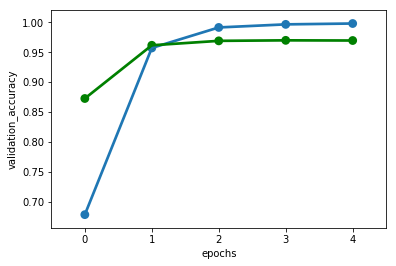

In [68]:
dfaccuracy = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=dfaccuracy, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=dfaccuracy, fit_reg=False, color='green')

In [69]:
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)


0.9743370402053037

## ANN with balance data using OverSampling

In [70]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train_res], batch_size=64, y=to_categorical(y_train_res), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=5, callbacks=[checkpointer])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 200, 128)          2286336   
_________________________________________________________________
flatten_2 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                819232    
_________________________________________________________________
dense_4 (Dense)              (None, 14)                462       
Total params: 3,106,030
Trainable params: 3,106,030
Non-trainable params: 0
_________________________________________________________________
Train on 51943 samples, validate on 17315 samples
Epoch 1/5
51943/51943 [==============================] - 121s 2ms/step - loss: 0.9

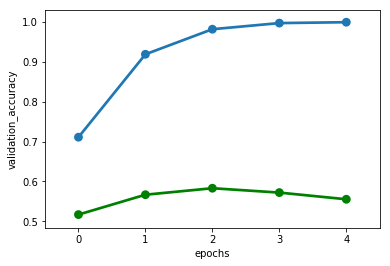

In [71]:
dfaccuracy = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=dfaccuracy, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=dfaccuracy, fit_reg=False, color='green')

In [72]:
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

0.9421157684630739

## ANN with balance data using UnderSampling

In [73]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 200, 128)          2286336   
_________________________________________________________________
flatten_3 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                819232    
_________________________________________________________________
dense_6 (Dense)              (None, 14)                462       
Total params: 3,106,030
Trainable params: 3,106,030
Non-trainable params: 0
_________________________________________________________________


In [74]:
filepath="weights-simple.hdf6"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_undersample], batch_size=64, y=to_categorical(y_undersample), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=5, callbacks=[checkpointer])

Train on 2782 samples, validate on 928 samples
Epoch 1/5
2782/2782 [==============================] - 10s 4ms/step - loss: 2.2503 - acc: 0.2671 - val_loss: 6.8060 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to weights-simple.hdf6
Epoch 2/5
2782/2782 [==============================] - 6s 2ms/step - loss: 1.4564 - acc: 0.6370 - val_loss: 8.8986 - val_acc: 0.0205

Epoch 00002: val_acc improved from 0.00000 to 0.02047, saving model to weights-simple.hdf6
Epoch 3/5
2782/2782 [==============================] - 6s 2ms/step - loss: 0.6655 - acc: 0.8702 - val_loss: 10.5182 - val_acc: 0.1142

Epoch 00003: val_acc improved from 0.02047 to 0.11422, saving model to weights-simple.hdf6
Epoch 4/5
2782/2782 [==============================] - 6s 2ms/step - loss: 0.2268 - acc: 0.9705 - val_loss: 11.0657 - val_acc: 0.1164

Epoch 00004: val_acc improved from 0.11422 to 0.11638, saving model to weights-simple.hdf6
Epoch 5/5
2782/2782 [============================

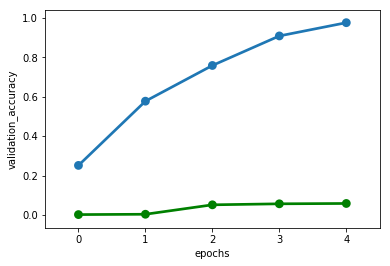

In [71]:
dfaccuracy = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=dfaccuracy, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=dfaccuracy, fit_reg=False, color='green')

In [75]:
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

0.8916452808668378

## RNN-LSTM

In [76]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)

x = LSTM(64)(embedding_layer)
x = Dense(32, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 200, 128)          2286336   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 14)                462       
Total params: 2,338,286
Trainable params: 2,338,286
Non-trainable params: 0
_________________________________________________________________


In [77]:
filepath="weights.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=10, callbacks=[checkpointer])

Train on 10518 samples, validate on 3507 samples
Epoch 1/10
10518/10518 [==============================] - 108s 10ms/step - loss: 1.2458 - acc: 0.6553 - val_loss: 0.6664 - val_acc: 0.8147

Epoch 00001: val_acc improved from -inf to 0.81466, saving model to weights.hdf5
Epoch 2/10
10518/10518 [==============================] - 98s 9ms/step - loss: 0.3507 - acc: 0.9072 - val_loss: 0.2624 - val_acc: 0.9250

Epoch 00002: val_acc improved from 0.81466 to 0.92501, saving model to weights.hdf5
Epoch 3/10
10518/10518 [==============================] - 98s 9ms/step - loss: 0.1319 - acc: 0.9670 - val_loss: 0.1782 - val_acc: 0.9535

Epoch 00003: val_acc improved from 0.92501 to 0.95352, saving model to weights.hdf5
Epoch 4/10
10518/10518 [==============================] - 98s 9ms/step - loss: 0.0695 - acc: 0.9838 - val_loss: 0.1483 - val_acc: 0.9589

Epoch 00004: val_acc improved from 0.95352 to 0.95894, saving model to weights.hdf5
Epoch 5/10
10518/10518 [==============================] - 97s 9m

### Checking Accuracy

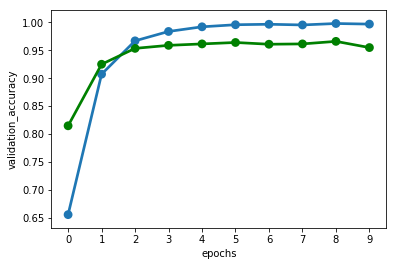

In [78]:
dfaccuracy = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=dfaccuracy, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=dfaccuracy, fit_reg=False, color='green')


In [79]:
model.load_weights('weights.hdf5')
predicted = model.predict(X_test)
predicted

array([[3.60805857e-10, 2.28966746e-04, 5.21267066e-05, ...,
        6.47653906e-06, 4.12752144e-08, 3.16981374e-09],
       [5.68790978e-12, 2.68449312e-05, 5.16077807e-06, ...,
        9.05559432e-07, 2.46974752e-09, 4.46294425e-11],
       [4.59869122e-12, 3.59886326e-05, 5.07490313e-06, ...,
        1.01764010e-06, 1.95987249e-09, 5.43518806e-11],
       ...,
       [9.25416774e-12, 3.53623436e-05, 8.56917814e-06, ...,
        1.05594813e-06, 3.30376726e-09, 8.56360885e-11],
       [8.81800588e-07, 2.28037443e-05, 1.12103227e-09, ...,
        1.13586815e-07, 3.92803777e-05, 5.30748501e-10],
       [1.29292370e-04, 7.36763686e-05, 9.51414307e-08, ...,
        1.39110671e-06, 8.18201050e-04, 2.53748098e-08]], dtype=float32)

In [80]:
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

0.9714856002281153

## CNN

In [81]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Conv1D(64, 5, activation='relu')(embedding_layer)
x = MaxPooling1D(pool_size=4)(x)
x = LSTM(64)(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 200, 128)          2286336   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 196, 64)           41024     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 49, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 14)                462       
Total para

In [82]:
filepath="weights.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=5, callbacks=[checkpointer])

Train on 10518 samples, validate on 3507 samples
Epoch 1/5
10518/10518 [==============================] - 69s 7ms/step - loss: 1.1551 - acc: 0.6695 - val_loss: 0.3677 - val_acc: 0.8976

Epoch 00001: val_acc improved from -inf to 0.89763, saving model to weights.hdf5
Epoch 2/5
10518/10518 [==============================] - 65s 6ms/step - loss: 0.2010 - acc: 0.9448 - val_loss: 0.1984 - val_acc: 0.9472

Epoch 00002: val_acc improved from 0.89763 to 0.94725, saving model to weights.hdf5
Epoch 3/5
10518/10518 [==============================] - 67s 6ms/step - loss: 0.0719 - acc: 0.9817 - val_loss: 0.1705 - val_acc: 0.9512

Epoch 00003: val_acc improved from 0.94725 to 0.95124, saving model to weights.hdf5
Epoch 4/5
10518/10518 [==============================] - 65s 6ms/step - loss: 0.0373 - acc: 0.9901 - val_loss: 0.1559 - val_acc: 0.9641

Epoch 00004: val_acc improved from 0.95124 to 0.96407, saving model to weights.hdf5
Epoch 5/5
10518/10518 [==============================] - 67s 6ms/step 

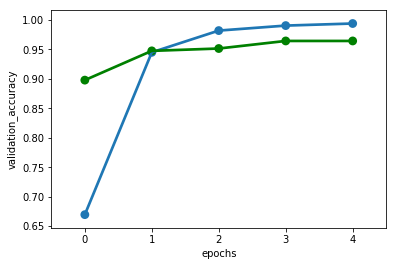

In [83]:
dfaccuracy = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=dfaccuracy, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=dfaccuracy, fit_reg=False, color='green')


In [84]:
model.load_weights('weights.hdf5')
predicted = model.predict(X_test)
predicted

array([[6.7897267e-06, 3.6565129e-05, 1.1663885e-06, ..., 1.6663688e-09,
        1.2678064e-08, 3.2523091e-09],
       [6.8870395e-06, 2.1889866e-05, 1.3552916e-06, ..., 1.6002967e-09,
        1.0795531e-08, 1.8720501e-09],
       [3.6906491e-05, 2.2117398e-05, 3.6633728e-06, ..., 7.3250193e-09,
        2.4836860e-08, 2.1648545e-09],
       ...,
       [4.3255563e-06, 4.0420662e-05, 3.0880062e-06, ..., 1.8813349e-09,
        1.8434138e-08, 2.7480083e-09],
       [2.7672341e-04, 1.5204040e-03, 4.9951090e-05, ..., 2.8775420e-04,
        5.9746468e-04, 3.8844089e-10],
       [4.7460673e-04, 1.9940876e-03, 1.0173178e-04, ..., 3.7122474e-04,
        2.8031792e-03, 1.2572431e-08]], dtype=float32)

In [85]:
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

0.9663530082691759

## CNN with Tensorboard

In [64]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Conv1D(64, 5, activation='relu')(embedding_layer)
x = MaxPooling1D(pool_size=4)(x)
x = LSTM(64)(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_23 (Embedding)     (None, 200, 128)          2118784   
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 196, 64)           41024     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 49, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_45 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_46 (Dense)             (None, 13)                429       
Total para

In [59]:
from keras.callbacks import TensorBoard
from time import time


In [73]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()),histogram_freq=5,write_graph=True)

In [74]:
model.fit([X_train], batch_size=10, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=5, callbacks=[tensorboard])

Train on 9948 samples, validate on 3316 samples
Epoch 1/5
9948/9948 [==============================] - 175s 18ms/step - loss: 0.1632 - acc: 0.9575 - val_loss: 0.0793 - val_acc: 0.9777
Epoch 2/5
9948/9948 [==============================] - 188s 19ms/step - loss: 0.0155 - acc: 0.9955 - val_loss: 0.0698 - val_acc: 0.9792
Epoch 3/5
9948/9948 [==============================] - 168s 17ms/step - loss: 0.0053 - acc: 0.9982 - val_loss: 0.0674 - val_acc: 0.9819
Epoch 4/5
9948/9948 [==============================] - 188s 19ms/step - loss: 0.0037 - acc: 0.9988 - val_loss: 0.0732 - val_acc: 0.9801
Epoch 5/5
9948/9948 [==============================] - 170s 17ms/step - loss: 0.0028 - acc: 0.9990 - val_loss: 0.0728 - val_acc: 0.9792


## Hyperparmeters Tunning

In [42]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlength):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlength))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(num_class, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [49]:
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],                   
                  embedding_dim=[50],
                  vocab_size=[vocab_size],
                  maxlength=[200])

In [44]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [52]:
 model = KerasClassifier(build_fn=create_model,
                            epochs=5, batch_size=64,
                            verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 82.5min finished


In [53]:
# Evaluate testing set
test_accuracy = grid.score(X_test, y_test)


In [56]:
print(grid_result.best_params_)

{'vocab_size': 16553, 'num_filters': 128, 'maxlength': 200, 'kernel_size': 5, 'embedding_dim': 50}


In [55]:
print(grid_result.best_score_)

0.980473461948488
